In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil

from clyent import color
from scipy.stats import linregress
import libraries as lib

kanker


In [2]:
directory = "../../HvA/CleanMobility - E-team/Logfiles/H2A/2022/20220628-20220701_race_nogaro/0023 - 20220701T141014 1h8m8s 13.336km Nogaro/"
file_master = "1.csv"
file_motordriver ="2.csv"

In [3]:
data_file_motordriver = lib.DataInladen(f'{directory}{file_motordriver}')
data_file_master = lib.DataInladen(f'{directory}{file_master}')


In [4]:
data_file_motordriver
#data_file_master

,Datalogger port,"Dataloggertijd, in s",Format header (>03|04),Tijd sinds laatste herstart motordriver (s),Spanning over de motor (V),Stroom door de motor (A),Vermogen geleverd aan de motor (W),Energie geleverd aan de motor sinds reset (J),Spanning aan de ingang van motordriver (V),Stroom door de ingang van motordriver (A),...,Tijdstip laatste verandering CruiseControl (s),Huidig stroom-instelpunt van cruise control,Doelsnelheid van cruise control,"Toestand cruise control2-knop (aan=1, uit=0)",Tijdstip laatste verandering cruise control2-knop,"GPS longitude, in graden","GPS latitude, in graden",GPS direction,"GPS speed, in km/h","GPS time, in seconden sinds het begin van de huidige GPS-week"
0,2,503.5736,03|04,0.0060,1.948,0.004,0.1,0,2.225,0.011,...,0.0,0,0.0,0,0.000,NaN,NaN,NaN,NaN,NaN
1,2,503.5792,03|04,0.0116,3.528,0.007,0.1,0,4.026,0.023,...,0.0,0,0.0,0,0.000,NaN,NaN,NaN,NaN,NaN
2,2,503.5848,03|04,0.0172,4.954,0.009,0.2,0,5.650,0.031,...,0.0,0,0.0,0,0.000,NaN,NaN,NaN,NaN,NaN
3,2,503.5904,03|04,0.0228,6.241,0.011,0.2,0,7.116,0.043,...,0.0,0,0.0,0,0.000,NaN,NaN,NaN,NaN,NaN
4,2,503.5961,03|04,0.0284,7.405,0.013,0.2,0,8.439,0.047,...,0.0,0,0.0,0,0.000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244087,2,2560.8613,03|04,2056.9358,0.041,0.103,0.0,129358,9.708,0.017,...,0.0,7,15.0,0,2044.28100002.4427,4346.2507,328.0,0.0,124942.0,NaN
244088,2,2560.8698,03|04,2056.9443,0.040,0.110,0.0,129358,9.301,0.026,...,0.0,7,15.0,0,2044.28100002.4427,4346.2507,328.0,0.0,124942.0,NaN
244089,2,2560.8783,03|04,2056.9529,0.040,0.118,0.0,129358,8.885,0.031,...,0.0,7,15.0,0,2044.28100002.4427,4346.2507,328.0,0.0,124942.0,NaN
244090,2,2560.8868,03|04,2056.9614,0.041,0.131,0.0,129358,8.441,0.037,...,0.0,7,15.0,0,2044.28100002.4427,4346.2507,328.0,0.0,124942.0,NaN


In [22]:

yas = 'Latitude'
xas = 'Longitude'
colorbar = 'Snelheid over de grond in km/h'
# Filtering the data so it's only the laps we want to analyze
# First filter so that the data without GPS data is removed
data_file_master = data_file_master[data_file_master[xas] != 0]
data_file_master = data_file_master[data_file_master[yas] != 0]
data_file_master = data_file_master[data_file_master[colorbar] != 0]


# Now filter out the beginning and end of the data, by removing the first and last 10% of the data
from math import ceil
filter = data_file_master.iloc[ceil(len(data_file_master)*0):ceil(len(data_file_master)*1)]
filter

,Datalogger port,"Dataloggertijd, in s",Format header (>08|03),NMEA type($GPRMC),Tijd,Status,Latitude,Noord of Zuid (N/S),Longitude,Oost of West (E/W),...,Mode indicator (A),Data in balancers,DegreesTrue,T,DegreesMagnetic,M,Snelheid tenopzichte van het water in Knots,N,Snelheid tenopzichte van het water in Kilometers,K
124,1,194.9040,08|03,$GPRMC,121017.0,A,4346.2889,N,2.5416,W,...,A,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,1,195.9052,08|03,$GPRMC,121018.0,A,4346.2857,N,2.5432,W,...,A,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,1,196.9250,08|03,$GPRMC,121019.0,A,4346.2846,N,2.5439,W,...,A,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,1,197.9082,08|03,$GPRMC,121020.0,A,4346.2842,N,2.5435,W,...,A,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,1,198.9123,08|03,$GPRMC,121021.0,A,4346.2840,N,2.5428,W,...,A,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4047,1,4123.0314,08|03,$GPRMC,131545.0,A,4346.3116,N,2.5435,W,...,A,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4048,1,4124.0539,08|03,$GPRMC,131546.0,A,4346.3121,N,2.5436,W,...,A,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,1,4128.0340,08|03,$GPRMC,131550.0,A,4346.3122,N,2.5434,W,...,A,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4060,1,4136.0484,08|03,$GPRMC,131558.0,A,4346.3124,N,2.5425,W,...,A,1100000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
lat_min, lat_max = 2.446, 2.45
lon_min, lon_max = 0.285+4.346e3,0.30+4.346e3 
yas = 'Latitude'
xas = 'Longitude'

finish_rijen = np.array([0])

# Itereer over elke rij in de DataFrame
for i in range(len(filter)):
    lat = filter[xas].iloc[i]  # Latitude van de i-de rij
    lon = filter[yas].iloc[i]  # Longitude van de i-de rij
    
    # Controleer of het punt binnen het vierkant valt
    if lat_min <= lat <= lat_max:
        #print(f"rij {i}: top")
        if lon_min <= lon <= lon_max:
            #print(f"Rij {i}: The point is inside the square.")
            finish_rijen = np.append(finish_rijen, i)

rondetijden = np.array([])
for j in range(len(finish_rijen)-1):
    rondetijd = (filter["Dataloggertijd, in s"].iloc[finish_rijen[j+1]] 
                 - filter["Dataloggertijd, in s"].iloc[finish_rijen[j]])
    rondetijden = np.append(rondetijden, rondetijd)
print(rondetijden)            
print(finish_rijen)

[836.1373 207.9843 268.0084 211.0279 222.9686 218.0228 266.9876]
[   0  510  718  986 1195 1418 1636 1903]


In [8]:
merged_df = lib.resample_and_merge2(data_file_master, data_file_motordriver, freq='1s')
merged_df

,Datalogger port_x,Tijd,Latitude,Longitude,Snelheid over de grond in km/h,Richting van de snelheid,Datum,Magnetische variatie,Magnetische directie,Data in balancers,...,"Toestand CruiseControl knop (aan=1, uit=0)",Tijdstip laatste verandering CruiseControl (s),Huidig stroom-instelpunt van cruise control,Doelsnelheid van cruise control,"Toestand cruise control2-knop (aan=1, uit=0)","GPS longitude, in graden","GPS latitude, in graden",GPS direction,"GPS speed, in km/h","GPS time, in seconden sinds het begin van de huidige GPS-week"
"Dataloggertijd, in s",,,,,,,,,,,,,,,,,,,,,
0 days 00:01:11,1.0,120813.0,0.0000,0.0000,0.0,0.0,10722.0,NaN,NaN,1.100000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:01:12,1.0,120814.0,0.0000,0.0000,0.0,0.0,10722.0,NaN,NaN,1.100000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:01:13,1.0,120815.0,0.0000,0.0000,0.0,0.0,10722.0,NaN,NaN,1.100000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:01:14,1.0,120816.0,0.0000,0.0000,0.0,0.0,10722.0,NaN,NaN,1.100000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:01:15,1.0,120817.0,0.0000,0.0000,0.0,0.0,10722.0,NaN,NaN,1.100000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 01:11:16,1.0,131818.0,4346.3114,2.5422,0.0,9.8,10722.0,NaN,NaN,1.100000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 01:11:17,1.0,131819.0,4346.3114,2.5422,0.0,9.8,10722.0,NaN,NaN,1.100000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 01:11:18,1.0,131820.0,4346.3114,2.5422,0.0,9.8,10722.0,NaN,NaN,1.100000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
vermogen_per_rondje = np.array([])
for w in range(len(finish_rijen)-1):
    vermogen = (merged_df["Vermogen geleverd aan de motor (W)"].iloc[finish_rijen[w+1]] - 
                merged_df["Vermogen geleverd aan de motor (W)"].iloc[finish_rijen[w]])
    vermogen_per_rondje = np.append(vermogen_per_rondje,vermogen)
print(vermogen_per_rondje)

[          nan   -0.33522443  192.52782373   -4.97288136 -145.97859279
    8.21079618   91.86127194]


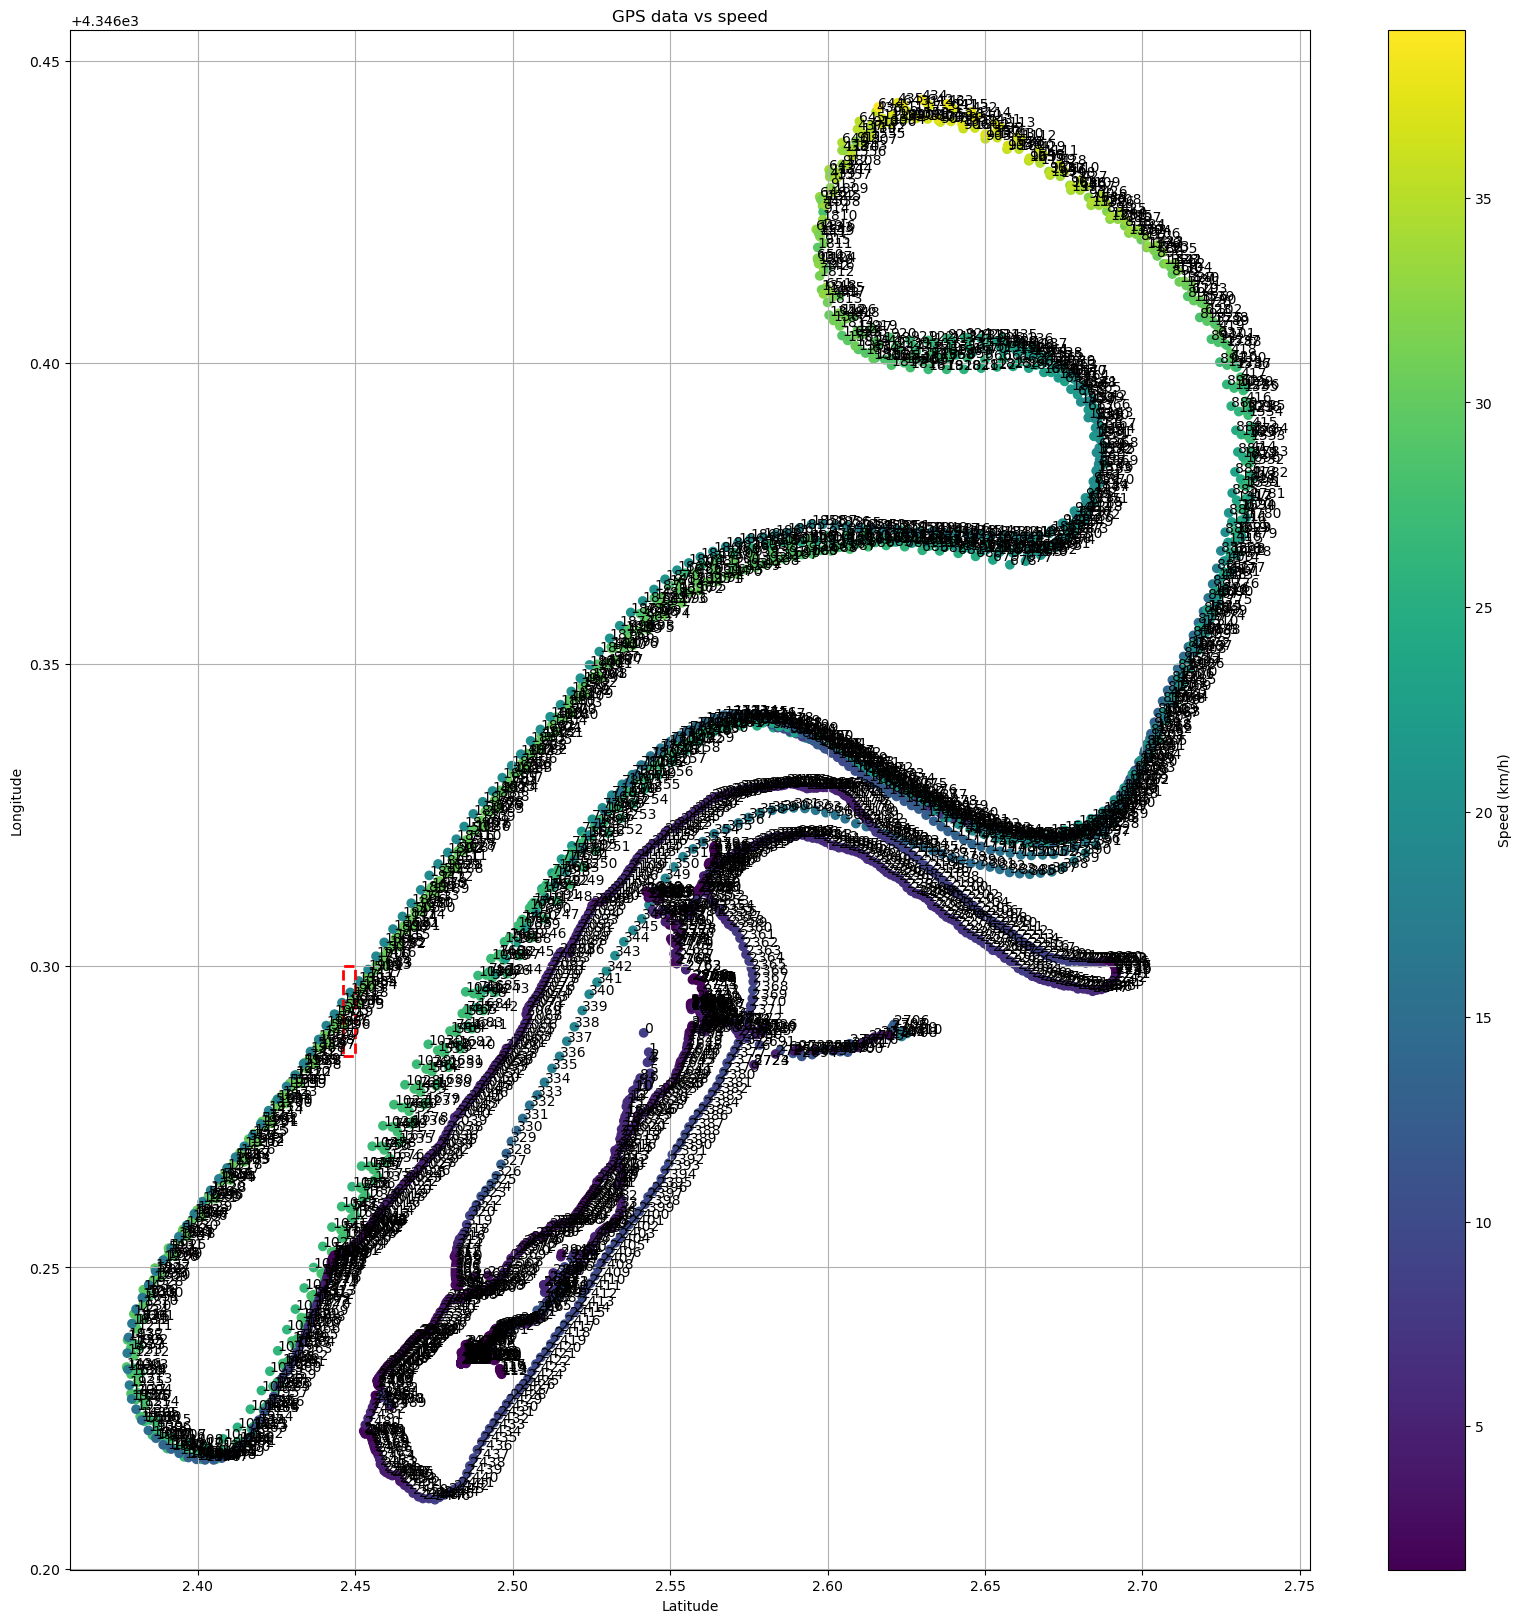

In [23]:
# Assuming 'filter' is your DataFrame and 'xas', 'yas', 'colorbar' are the column names
plt.figure(figsize=(20, 20))
plt.scatter(filter[xas], filter[yas], c=filter[colorbar], cmap='viridis')
plt.title('GPS data vs speed')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Adding a colorbar with a label for the speed in km/h
cbar = plt.colorbar()
cbar.set_label('Speed (km/h)')

# Coordinates for the box
lat_min, lat_max = 2.446, 2.45
lon_min, lon_max = 0.285+4.346e3,0.30+4.346e3 
# Plotting the box
plt.plot([lat_min, lat_max, lat_max, lat_min, lat_min],
         [lon_min, lon_min, lon_max, lon_max, lon_min],
         color='red', linestyle='--', linewidth=2)
for i in range(len(filter)):
    lat = filter[yas].iloc[i]
    lon = filter[xas].iloc[i]
    
    # Voeg de rijindex toe als tekst in de plot
    plt.text(lon, lat, str(i), fontsize=10, color='black')
plt.grid()
plt.show()